# What is the Safest Neighborhood in Pittsburgh?
-------------------------------------

## Police Incidents

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [2]:
ReadIncident = pd.read_csv("incident-data.csv") #import the data file 
ReadIncident.head(5) #print the first five rows

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,306530435,23035798,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,307051774,23038735,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,307082554,23038816,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,307106971,23038916,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,307112015,23038967,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945


In [3]:
#group neighborhoods and count how many times each neighborhood shows up on the data
NumOfIncident = ReadIncident.groupby(['INCIDENTNEIGHBORHOOD'])['INCIDENTNEIGHBORHOOD'].count() 
NumOfIncident.sort_values(ascending = True) #sort from least to greatest

INCIDENTNEIGHBORHOOD
East Carnegie                  1
Chartiers City                 2
Esplen                         2
Arlington Heights              3
Regent Square                  3
                            ... 
East Liberty                  78
Mount Washington              79
Carrick                       84
South Side Flats             138
Central Business District    355
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64

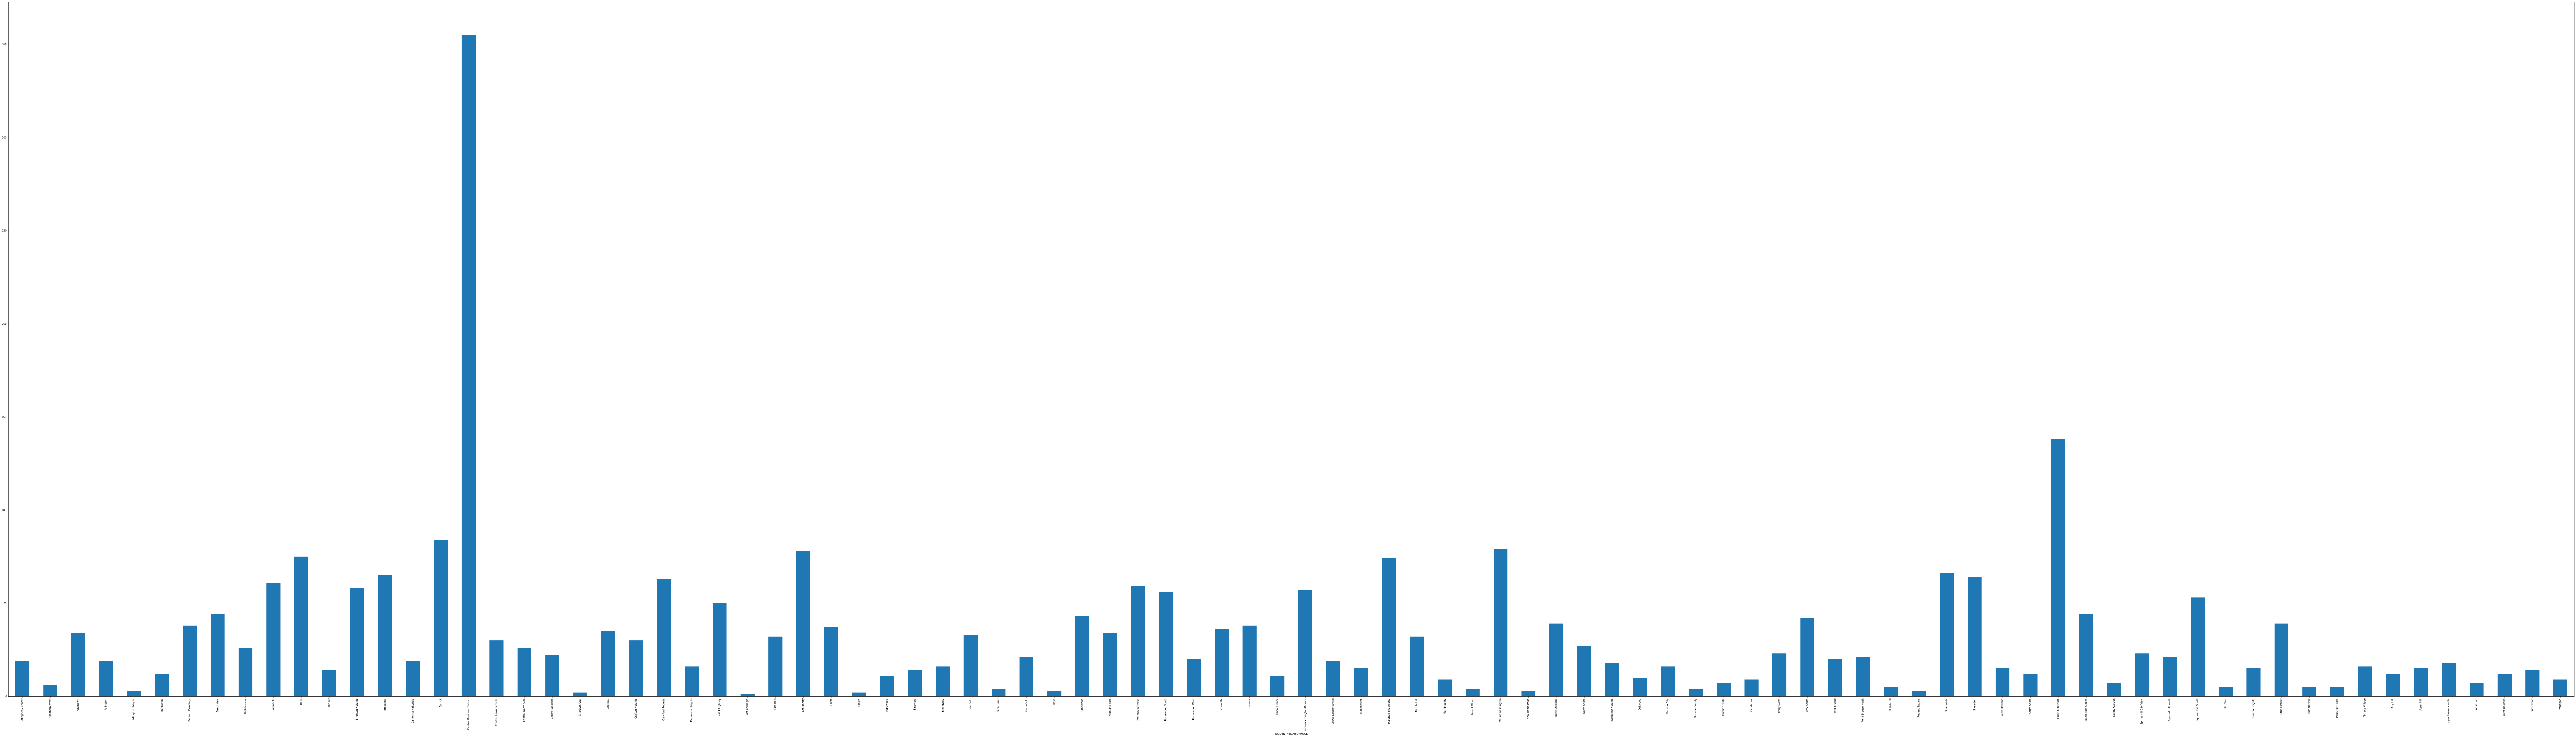

In [4]:
NumOfIncident.plot.bar(figsize = (180, 50)) # turn plot graph to bar graph and expanded the graph

## Arrests

Central Business District    3777
South Side Flats             3184
Carrick                      2198
East Allegheny               2006
Homewood South               1939
                             ... 
Ridgemont                      35
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64

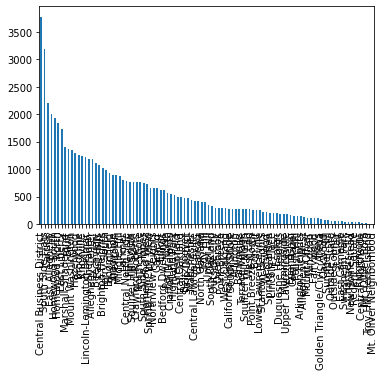

In [5]:
data = pd.read_csv('arrestdata.csv')

#data.head()

neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhoods.sort_values(ascending=False)
display(neighborhoods)
neighborhoods.plot.bar()

neighborhood_string = data['INCIDENTNEIGHBORHOOD'].astype(str)
#print(neighborhood_string)

In [6]:
neighborhood_dictionary = {}
for index, row in data.iterrows():
    if row['INCIDENTNEIGHBORHOOD'] not in neighborhood_dictionary.keys():
        neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] = 1
    else:
        neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] = neighborhood_dictionary[row['INCIDENTNEIGHBORHOOD']] + 1
        
arrests_byHood = pd.DataFrame()
arrests_byHood["Neighborhood"] = list(neighborhood_dictionary.keys())
arrests_byHood["Arrests"] = list(neighborhood_dictionary.values())
arrests_byHood.sort_values(by=["Arrests"], ascending = False)

,Neighborhood,Arrests
87,Central Business District,3777
13,South Side Flats,3184
9,NaN,2324
11,Carrick,2198
3,East Allegheny,2006
...,...,...
94,Ridgemont,35
26,Central Northside,23
98,Mt. Oliver Boro,18
27,Troy Hill-Herrs Island,6


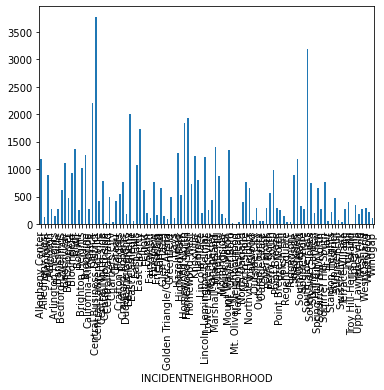

In [7]:
counts_neighborhoods = data.groupby(['INCIDENTNEIGHBORHOOD'])['INCIDENTNEIGHBORHOOD'].count()
counts_neighborhoods.plot(kind = "bar")

In [8]:
counts_neighborhoods.head()

INCIDENTNEIGHBORHOOD
Allegheny Center     1180
Allegheny West        122
Allentown             884
Arlington             275
Arlington Heights     138
Name: INCIDENTNEIGHBORHOOD, dtype: int64

,hood,Arrests,geometry
0,Central Oakland,485.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,408.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,283.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,768.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,470.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


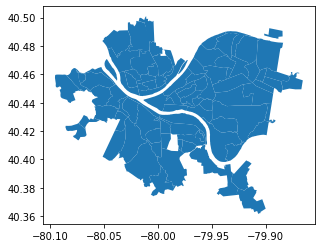

In [9]:
neighborhood_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_map.plot()

arrests_map = neighborhood_map.merge(arrests_byHood, how = 'left', left_on = 'hood', right_on = "Neighborhood")
arrests_map[['hood', 'Arrests', 'geometry']].head()

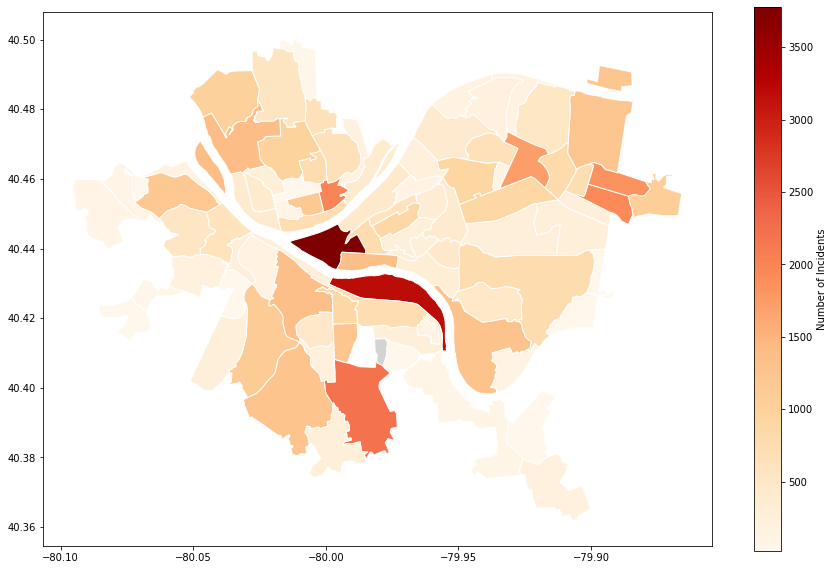

In [10]:
arrests_map.plot(column='Arrests', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Firearm Seizures

In [17]:
# import dataset of firearm seizures
firearm_seizures = pd.read_csv("Firearm-Seizures.csv")
fSeizures_byHood = firearm_seizures.groupby("neighborhood").sum()["total_count"] # groupby neighborhood and sum the total number of seizures
fSeizures_byHood.sort_values(ascending=False)

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64

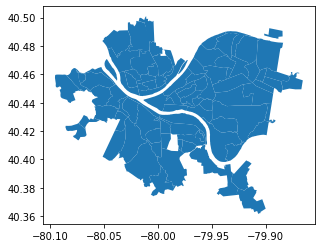

In [18]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [19]:
# do the merge
seizures_map = neighborhoods.merge(fSeizures_byHood, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
seizures_map[['hood','total_count','geometry']].head()

,hood,total_count,geometry
0,Central Oakland,20.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,21.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,14.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,57.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,24.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


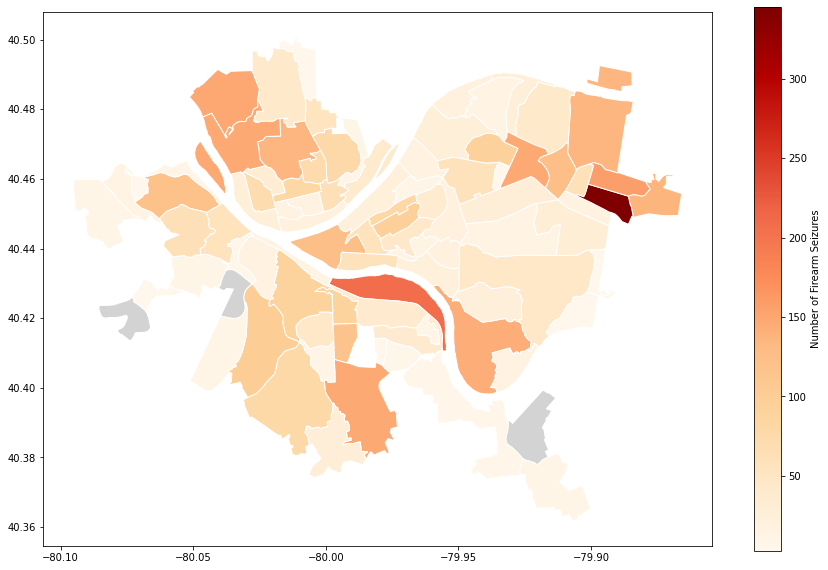

In [20]:
seizures_map.plot(column='total_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Firearm Seizures"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Parks

In [21]:
# import dataset of parks
parks = pd.read_csv("Parks.csv")
parks_hoods = {}
for index, row in parks.iterrows():
    if row["neighborhood"] not in parks_hoods.keys():
        parks_hoods[row["neighborhood"]] = 1
    else:
        parks_hoods[row["neighborhood"]] = parks_hoods[row["neighborhood"]] + 1
parks_byHood = pd.DataFrame()
parks_byHood["Neighborhood"] = list(parks_hoods.keys())
parks_byHood["Total"] = list(parks_hoods.values())
parks_byHood.sort_values(by=["Total"], ascending=False)

,Neighborhood,Total
6,East Liberty,12
4,Central Business District,10
0,Beechview,8
8,South Side Slopes,7
34,Point Breeze,7
...,...,...
47,Hays,1
28,Arlington,1
29,Stanton Heights,1
51,Morningside,1


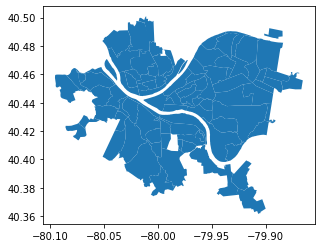

In [22]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [23]:
# do the merge
parks_map = neighborhoods.merge(parks_byHood, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
parks_map[['hood','Total','geometry']].head()

,hood,Total,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


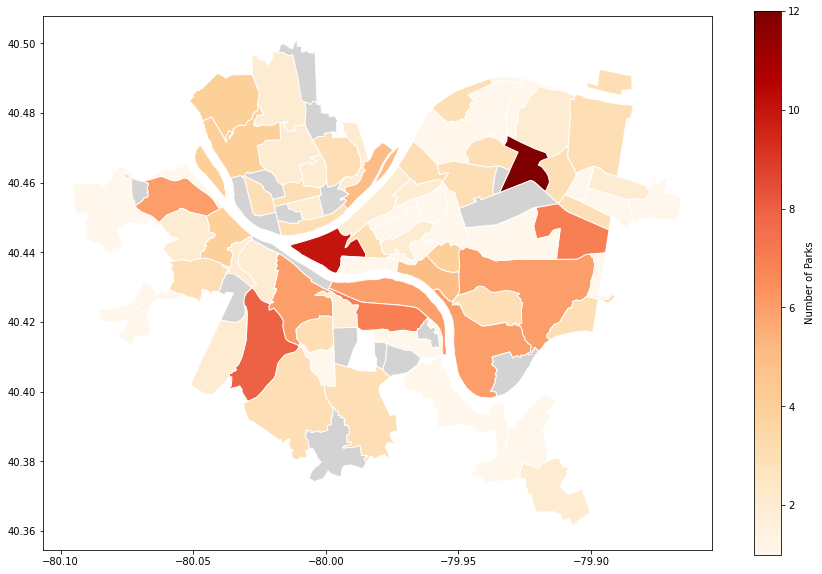

In [24]:
parks_map.plot(column='Total', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Aggregated Data

**Formula** = `# of parks/(# incidents + arrests + seizures)`

In [123]:
aggregate_num = parks_byHood
aggregate_denom = {}
# load in data from arrests
for index, row in arrests_byHood.iterrows():
    if row["Neighborhood"] not in aggregate_denom.keys():
        aggregate_denom[row["Neighborhood"]] = row["Arrests"]
    else:
        aggregate_denom[row["Neighborhood"]] = aggregate_denom[row["Neighborhood"]] + row["Arrests"]

print(aggregate_denom)

{'Bloomfield': 927, 'Outside City': 298, 'Westwood': 209, 'East Allegheny': 2006, 'Crafton Heights': 544, 'Greenfield': 496, 'Brookline': 1266, 'Regent Square': 35, 'East Liberty': 1731, nan: 2324, 'East Hills': 1081, 'Carrick': 2198, 'Allegheny Center': 1180, 'South Side Flats': 3184, 'Sheraden': 1191, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 260, 'Perry South': 989, 'Allentown': 884, 'North Shore': 756, 'Marshall-Shadeland': 1400, 'Central Oakland': 485, 'Middle Hill': 878, 'Strip District': 470, 'Lincoln-Lemington-Belmar': 1213, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 529, 'Homewood North': 1835, 'Northview Heights': 661, 'Brighton Heights': 1023, 'Hazelwood': 1285, 'Perry North': 567, 'Bedford Dwellings': 616, 'Elliott': 619, 'Beechview': 1114, 'Fineview': 772, 'Glen Hazel': 153, 'Spring Hill-City View': 664, 'Bluff': 1369, 'Manchester': 445, 'Homewood West': 729, 'Outside County': 52, 'Point Breeze': 287, 'Homewoo

In [124]:
fSeizures = {}
for index, row in firearm_seizures.iterrows():
    if row["neighborhood"] not in fSeizures.keys():
        fSeizures[row["neighborhood"]] = row["total_count"]
    else:
        fSeizures[row["neighborhood"]] = fSeizures[row["neighborhood"]] + row["total_count"]

fSeizures_DF = pd.DataFrame()
fSeizures_DF["Neighborhood"] = list(fSeizures.keys())
fSeizures_DF["Total"] = list(fSeizures.values())
        
# load in data from firearms
for index, row in fSeizures_DF.iterrows():
    if row["Neighborhood"] not in aggregate_denom.keys():
        aggregate_denom[row["Neighborhood"]] = row["Total"]
    else:
        aggregate_denom[row["Neighborhood"]] = aggregate_denom[row["Neighborhood"]] + row["Total"]

print(aggregate_denom)

{'Bloomfield': 985, 'Outside City': 298, 'Westwood': 219, 'East Allegheny': 2068, 'Crafton Heights': 607, 'Greenfield': 521, 'Brookline': 1345, 'Regent Square': 39, 'East Liberty': 1879, nan: 3328, 'East Hills': 1218, 'Carrick': 2346, 'Allegheny Center': 1198, 'South Side Flats': 3392, 'Sheraden': 1312, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 279, 'Perry South': 1125, 'Allentown': 975, 'North Shore': 776, 'Marshall-Shadeland': 1548, 'Central Oakland': 505, 'Middle Hill': 974, 'Strip District': 494, 'Lincoln-Lemington-Belmar': 1349, 'Central Northside': 106, 'Troy Hill-Herrs Island': 6, 'Highland Park': 571, 'Homewood North': 1994, 'Northview Heights': 717, 'Brighton Heights': 1172, 'Hazelwood': 1429, 'Perry North': 611, 'Bedford Dwellings': 699, 'Elliott': 676, 'Beechview': 1215, 'Fineview': 847, 'Glen Hazel': 170, 'Spring Hill-City View': 741, 'Bluff': 1427, 'Manchester': 517, 'Homewood West': 790, 'Outside County': 52, 'Point Breeze': 317, 'Homew

In [125]:
incidents = {}
for index, row in ReadIncident.iterrows():
    if row["INCIDENTNEIGHBORHOOD"] not in incidents.keys():
        incidents[row["INCIDENTNEIGHBORHOOD"]] = 1
    else:
        incidents[row["INCIDENTNEIGHBORHOOD"]] = incidents[row["INCIDENTNEIGHBORHOOD"]] + 1

incidents_DF = pd.DataFrame()
incidents_DF["Neighborhood"] = list(incidents.keys())
incidents_DF["Total"] = list(incidents.values())
        
# load in data from incidents
for index, row in fSeizures_DF.iterrows():
    if row["Neighborhood"] not in aggregate_denom.keys():
        aggregate_denom[row["Neighborhood"]] = row["Total"]
    else:
        aggregate_denom[row["Neighborhood"]] = aggregate_denom[row["Neighborhood"]] + row["Total"]

print(aggregate_denom)

{'Bloomfield': 1043, 'Outside City': 298, 'Westwood': 229, 'East Allegheny': 2130, 'Crafton Heights': 670, 'Greenfield': 546, 'Brookline': 1424, 'Regent Square': 43, 'East Liberty': 2027, nan: 4332, 'East Hills': 1355, 'Carrick': 2494, 'Allegheny Center': 1216, 'South Side Flats': 3600, 'Sheraden': 1433, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 298, 'Perry South': 1261, 'Allentown': 1066, 'North Shore': 796, 'Marshall-Shadeland': 1696, 'Central Oakland': 525, 'Middle Hill': 1070, 'Strip District': 518, 'Lincoln-Lemington-Belmar': 1485, 'Central Northside': 189, 'Troy Hill-Herrs Island': 6, 'Highland Park': 613, 'Homewood North': 2153, 'Northview Heights': 773, 'Brighton Heights': 1321, 'Hazelwood': 1573, 'Perry North': 655, 'Bedford Dwellings': 782, 'Elliott': 733, 'Beechview': 1316, 'Fineview': 922, 'Glen Hazel': 187, 'Spring Hill-City View': 818, 'Bluff': 1485, 'Manchester': 589, 'Homewood West': 851, 'Outside County': 52, 'Point Breeze': 347, 'Ho

In [186]:
aggregate_denomDF = pd.DataFrame()
aggregate_denomDF["Neighborhood"] = list(aggregate_denom.keys())
aggregate_denomDF["Total"] = list(aggregate_denom.values())

final_Data = {}

for index, row in aggregate_denomDF.iterrows():
    if row["Neighborhood"] not in final_Data.keys():
        final_Data[row["Neighborhood"]] = row["Total"]
    else:
        final_Data[row["Neighborhood"]] = final_Data[row["Neighborhood"]]-(3*row["Total"])

#sort
sorted_values = sorted(final_Data.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in final_Data.keys():
        if final_Data[k] == i:
            sorted_dict[k] = final_Data[k]
#flip values relatively
i = 0
while i < 50:
    first_key = list(sorted_dict)[i]
    first_val = list(sorted_dict.values())[i]
    last_key = list(sorted_dict)[100-i]
    last_val = list(sorted_dict.values())[100-i]
    sorted_dict[last_key] = first_val
    sorted_dict[first_key] = last_val
    i += 1

final_DataDF = pd.DataFrame()
final_DataDF["Neighborhood"] = list(sorted_dict.keys())
final_DataDF["Total"] = list(sorted_dict.values())
final_DataDF = final_DataDF.dropna()
display(final_DataDF)

,Neighborhood,Total
0,Mt. Oliver Neighborhood,4332
1,Troy Hill-Herrs Island,4027
2,Mt. Oliver,3600
3,Mt. Oliver Boro,2629
4,Mount Oliver Borough,2494
...,...,...
95,Homewood North,35
96,Carrick,18
97,Homewood South,18
98,South Side Flats,8


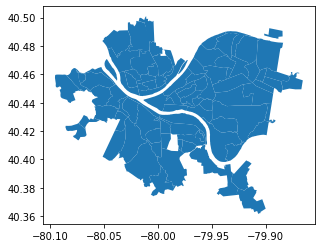

In [187]:
neighborhood_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_map.plot()
# do the merge
final_map = neighborhood_map.merge(final_DataDF, how='left', left_on='hood', right_on='Neighborhood')


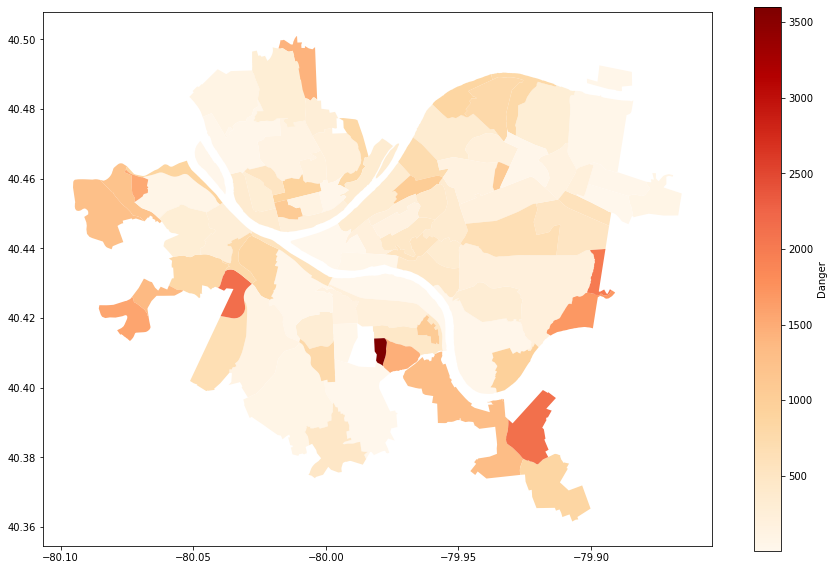

In [188]:
final_map.plot(column='Total', # set the data to be used for coloring
               cmap='OrRd',
                legend = True,
                legend_kwds={'label':"Danger"},
                figsize=(15,10))

In [190]:
final_map.sort_values(by=["Total"], ascending = False)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,Neighborhood,Total
51,53,147.0,42,003,561700,2,420035617002,Block Group 2,G5030,S,...,Anthony Kobak,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.876550e+06,7452.430274,"POLYGON ((-79.97842 40.40626, -79.97848 40.406...",Mt. Oliver,3600
85,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.024662e+07,16308.779881,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",Ridgemont,2153
79,82,326.0,42,003,310300,1,420033103001,Block Group 1,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.214535e+07,22945.937276,"POLYGON ((-79.91815 40.39936, -79.91621 40.398...",New Homestead,2130
67,69,215.0,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.360984e+06,16004.734291,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",Regent Square,2027
35,37,83.0,42,003,141100,1,420031411001,Block Group 1,G5030,S,...,Ose Akinlotan,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.337917e+07,20791.544629,"POLYGON ((-79.89157 40.42674, -79.89201 40.426...",Swisshelm Park,1696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,76,292.0,42,003,130200,2,420031302002,Block Group 2,G5030,S,...,Christopher Corbett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.210455e+07,16973.141853,"POLYGON ((-79.89446 40.46255, -79.89446 40.462...",Homewood North,35
73,75,286.0,42,003,130400,3,420031304003,Block Group 3,G5030,S,...,Christopher Corbett,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.091284e+07,16280.935037,"POLYGON ((-79.88666 40.45521, -79.88651 40.455...",Homewood South,18
32,34,74.0,42,003,290400,3,420032904003,Block Group 3,G5030,S,...,Sophia Robison,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,4.663720e+07,40393.927039,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",Carrick,18
13,15,16.0,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,Anthony Kobak,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,2.608194e+07,34675.877094,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",South Side Flats,8
